In [1]:
from HMM_Functions import *
from matplotlib import cm, pyplot as plt
import seaborn
from matplotlib.dates import YearLocator, MonthLocator, DayLocator
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
file_name = 'fwonk.us.txt'
df_fwonk_stock = get_stock_data(file_name)
df_fwonk_stock = df_fwonk_stock[-30:]
df_fwonk_stock = df_fwonk_stock.reset_index()
df_fwonk_stock

,index,Close,Date,High,Low,Open,OpenInt,Volume
0,801,37.91,2017-10-02,38.21,37.46,38,0,1194803
1,802,39.08,2017-10-03,39.1,37.79,38.17,0,3393734
2,803,39.88,2017-10-04,39.97,38.76,39.01,0,2267635
3,804,40.72,2017-10-05,41.1287,39.95,39.99,0,4040042
4,805,40.45,2017-10-06,40.83,40.085,40.75,0,3091133
5,806,40.16,2017-10-09,40.6,40.1,40.48,0,1626664
6,807,39.58,2017-10-10,40.315,39.51,40.13,0,584055
7,808,39.23,2017-10-11,39.61,39.07,39.61,0,1571951
8,809,39.64,2017-10-12,39.65,38.59,39.08,0,1051405
9,810,39.5,2017-10-13,39.8,39.27,39.27,0,543815


In [3]:
# Get data and initialize
df_emission = get_emission(df_fwonk_stock)
emission = df_emission['Emission'][1:]
emission_list = emission.tolist()

tpm = [[0.3, 0.3, 0.2, 0.1, 0.05, 0.05],
       [0.25, 0.3, 0.25, 0.1, 0.05, 0.05],
       [0.1, 0.1, 0.3, 0.2, 0.2, 0.1],
       [0.1, 0.1, 0.2, 0.3, 0.2, 0.1],
       [0.05, 0.05, 0.1, 0.25, 0.3, 0.25],
       [0.05, 0.05, 0.1, 0.2, 0.3, 0.3]]

#tpm = create_TPM(6)

epm = create_EPM(6, 2)
NUM_STATES = 6

pi = [.2, .1, .1, .2, .1, .1]

In [4]:
tpm, epm = baum_welch(tpm, epm, pi, emission_list)

In [5]:
tpm

array([[0.29355506, 0.29129435, 0.20872813, 0.10057817, 0.05324395,
        0.05260035],
       [0.23647252, 0.29074831, 0.26487405, 0.10044585, 0.0541938 ,
        0.05326546],
       [0.09148364, 0.09381834, 0.3076094 , 0.19436488, 0.2096731 ,
        0.10305064],
       [0.09333529, 0.09477001, 0.20547478, 0.29357639, 0.20966536,
        0.10317817],
       [0.04597458, 0.0466316 , 0.10127048, 0.2413947 , 0.31013883,
        0.25458982],
       [0.04572245, 0.04654726, 0.10111011, 0.19240261, 0.30956697,
        0.3046506 ]])

In [6]:
epm

[[0.6104602026909542, 0.3895397973090458],
 [0.42414127443809196, 0.5758587255619083],
 [0.39005738008189716, 0.6099426199181031],
 [0.48698078907494546, 0.5130192109250548],
 [0.3905874208149669, 0.6094125791850331],
 [0.4337622924317218, 0.5662377075682786]]

In [7]:
states_path = viterbi(tpm, epm, pi, emission_list)

In [8]:
updated_stock_df = add_hidden_states_to_df(df_emission, states_path)
updated_stock_df

,Date,Close,Yesterday Close,Close Value Difference,Emission,Hidden_State
0,2017-10-02,37.91,NaN,NaN,NaN,starting state
1,2017-10-03,39.08,37.91,1.17,Increasing,0
2,2017-10-04,39.88,39.08,0.80,Increasing,0
3,2017-10-05,40.72,39.88,0.84,Increasing,0
4,2017-10-06,40.45,40.72,-0.27,Decreasing,0
5,2017-10-09,40.16,40.45,-0.29,Decreasing,0
6,2017-10-10,39.58,40.16,-0.58,Decreasing,1
7,2017-10-11,39.23,39.58,-0.35,Decreasing,1
8,2017-10-12,39.64,39.23,0.41,Increasing,1
9,2017-10-13,39.50,39.64,-0.14,Decreasing,1


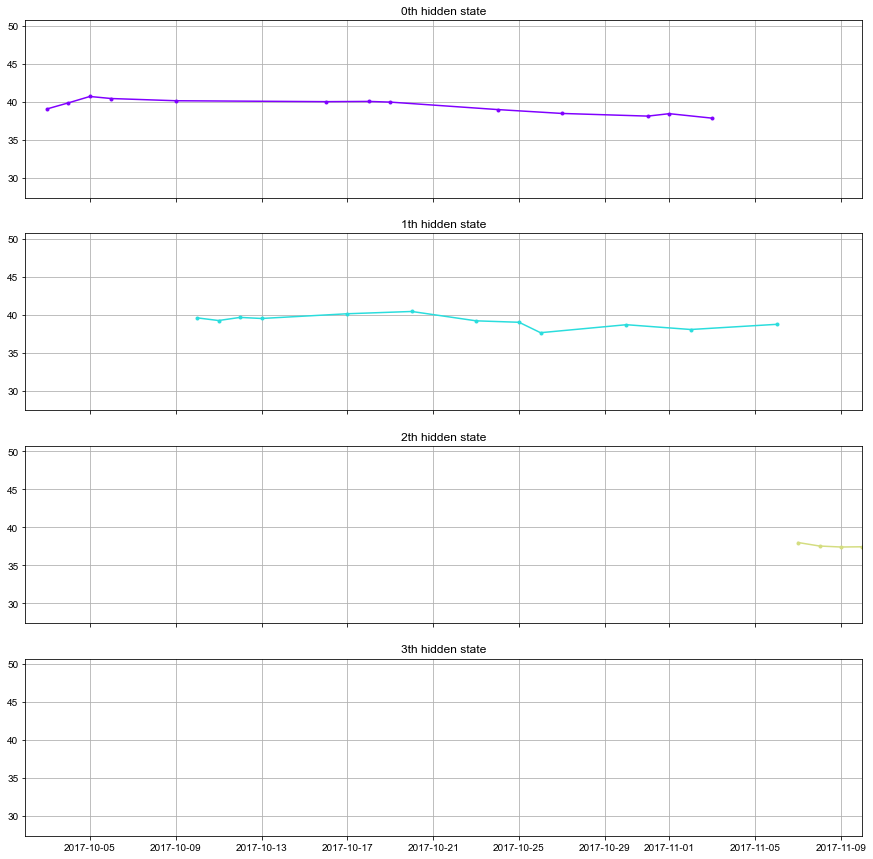

In [9]:
graph_hidden_states(updated_stock_df, states_path)